In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [68]:
dt = 0.5; T = 200 # ms
nt = round(T/dt) # シミュレーションのステップ数

# Regular spiking (RS) neurons
C = 100      # 膜容量(pF)
a = 0.03     # 回復時定数の逆数 (1/ms)
b = -2       # uのvに対する共鳴度合い(pA/mV)
k = 0.65      # ゲイン (pA/mV)
d = 100      # 発火で活性化される正味の外向き電流(pA)
vrest = -60  # 静止膜電位 (mV) 
vreset = -50 # リセット電位 (mV) 
vthr = -40   # 閾値電位 (mV)
vpeak = 35   #　ピーク電位 (mV)
t = np.arange(nt)*dt

spike = np.zeros(nt)
spike_times = [100, 150, 200]
spike[spike_times] = 1

td = 20 # synaptic decay time (ms)
tr = 2 # synaptic rise time (ms)

In [69]:
# 初期化(膜電位, 膜電位(t-1), 回復電流)
v = vrest; v_ = v; u = 0
v_arr = np.zeros(nt) # 膜電位を記録する配列
u_arr = np.zeros(nt) # 回復変数を記録する配列

r = 0; hr = 0 # 初期値
X_arr = np.zeros((nt, 4)) # 記録用配列

# シミュレーション
r_list = []
# シミュレーション
for i in tqdm(range(nt)):
    r = r*(1-dt/tr) + hr*dt 
    hr = hr*(1-dt/td) + spike[i]/(tr*td)
    r_list.append(r)

    dv = (k*(v - vrest)*(v - vthr) - u + r*2e3) / C
    v = v + dt*dv # 膜電位の更新
    u = u + dt*(a*(b*(v_-vrest)-u)) # 膜電位の更新
        
    s = 1*(v>=vpeak) #発火時は1, その他は0の出力
        
    u = u + d*s # 発火時に回復変数を上昇
    v = v*(1-s) + vreset*s # 発火時に膜電位をリセット
    v_ = v # v(t-1) <- v(t)

    v_arr[i] = v  # 膜電位の値を保存
    u_arr[i] = u  # 回復変数の値を保存

100%|█████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 66854.82it/s]


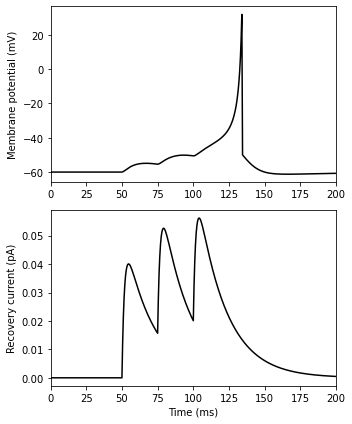

In [70]:
# 描画
plt.figure(figsize=(5, 6))
plt.subplot(2,1,1)
plt.plot(t, v_arr, color="k")
#plt.title("Regular spiking (RS) neurons")
plt.ylabel('Membrane potential (mV)') 
plt.xlim(0, T)
plt.tight_layout()

plt.subplot(2,1,2)
plt.plot(t, np.array(r_list), color="k")
plt.xlabel('Time (ms)')
plt.ylabel('Recovery current (pA)')
plt.xlim(0, T) 

plt.tight_layout()
plt.show()